# ME 793 - Assignment 9
19D100011

# Tutorial - Alankar
# Differentiation using autograd
### Example of an Ordinary Differential Equation
### Ref. Online sources + modification.
### We will solve ODE $\frac{dy}{dx}=-2xy; y_0=1$
### Loss function will be defined based on ODE and initial condition.
### Loss = $(\frac{dy}{dx} + 2xy)^2 + (y_0 - 1)^2$
### $y_0$ in the above equation is the estimate $y_0$ for the parameters of the model. See the code below for more clarification.
### $\frac{dy}{dx}$ is determined using autograd i.e. auto differentiation and
### the estimation of y (our desired solution) is improved by iteratively minimizing the loss.

In [221]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import time
import matplotlib.pyplot as plt

In [222]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    return x / (1.0 + np.exp(-x))

In [223]:
def init_random_params(layer_sizes):
    rs=npr.RandomState(0)
    #Define a list of (weights, biases tuples, one for each layer. We will use a single hidden layer network."
    return [(rs.randn(insize, outsize),   # weight matrix
             rs.randn(outsize))           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

    # The above line will run the for loop from insize to outsize, and will store the values
    # layer_sizes[:-1] fills the weight matrix
    # layer_sizes[1:] fills the bias array

In [224]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)
    return outputs

# Answer 1

In [225]:
# Define the objective function.
def lossfunction(params, step):
    y0 = 1.0
    x = np.linspace(-2, 2).reshape((-1, 1))
    dydx = elementwise_grad(y, 1) # this is the partial derivative of y with respect to inputs i.e. x
    # The objective is to minimize i.e. tend to zero.
    # dydx = -2xy
    # ycall = y(params,inputs)
    zeq = dydx(params, x) - (-2*x*y(params, x))
    ic = y(params, 0) - y0 # For my solution i.e. a set of paramaters 'params' this condition should be satisfied
    # since this is the intial condition.
    # If I minimize zeq and ic together or in some combined form, I will get a set of 'params' that give me
    # solution of dy/dx
    # Let us setup the loss function as zeq + ic
    return np.mean(zeq**2 + ic**2)

In [ ]:
def callback(params, step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))

In [ ]:
def model(neurons):
    layer_sizes = [1, neurons, 1]
    # Make an initial guess of params:
    params = init_random_params(layer_sizes=layer_sizes)
    # Note that we are using a single hidden layer network. There is only one input and one output.

    # ODE solver for n nodes
    # grad(losfunciton) = d J(theta) / d theta
    params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=1000)

    return params

Running model having 5 neuron in hidden layer
Iteration   0 lossfunction 103.2748317267323
Iteration 100 lossfunction 0.6933466559455279
Iteration 200 lossfunction 0.3489530774518943
Iteration 300 lossfunction 0.11496627233273161
Iteration 400 lossfunction 0.051060866294032864
Iteration 500 lossfunction 0.027726326565094585
Iteration 600 lossfunction 0.01868086745205276
Iteration 700 lossfunction 0.015224233073384856
Iteration 800 lossfunction 0.01323940149114899
Iteration 900 lossfunction 0.011639100480307845


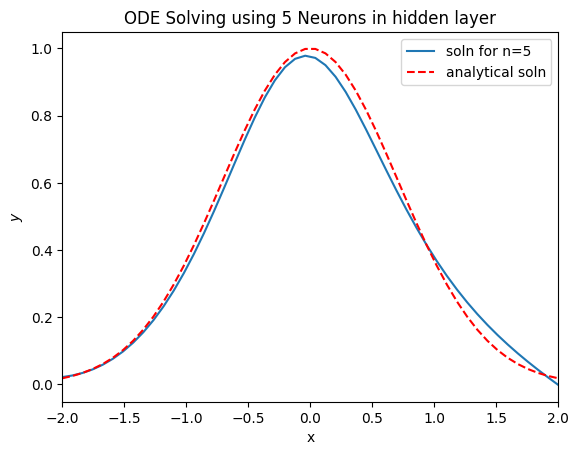

Running model having 10 neuron in hidden layer
Iteration   0 lossfunction 23.061263753151106
Iteration 100 lossfunction 0.04722256868838909
Iteration 200 lossfunction 0.0008825239664144024
Iteration 300 lossfunction 0.00032383551997148554
Iteration 400 lossfunction 0.0003199211987161124
Iteration 500 lossfunction 0.00031610468107519233
Iteration 600 lossfunction 0.000312140887046091
Iteration 700 lossfunction 0.0003079815244638133
Iteration 800 lossfunction 0.0003035895911621873
Iteration 900 lossfunction 0.000298946923933649


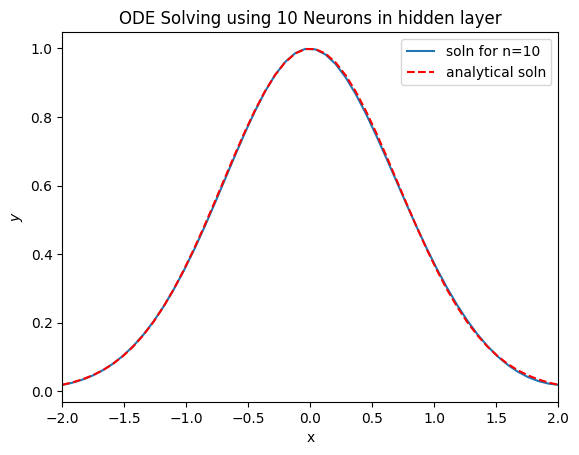

Running model having 15 neuron in hidden layer
Iteration   0 lossfunction 379.66530536856686
Iteration 100 lossfunction 0.040149547788033396
Iteration 200 lossfunction 0.02342488932019774
Iteration 300 lossfunction 0.01272914620414834
Iteration 400 lossfunction 0.006696219706321734
Iteration 500 lossfunction 0.0038514147225335595
Iteration 600 lossfunction 0.0026259100517855073
Iteration 700 lossfunction 0.0020375608571324725
Iteration 800 lossfunction 0.0016705846143801222
Iteration 900 lossfunction 0.0013939285458893422


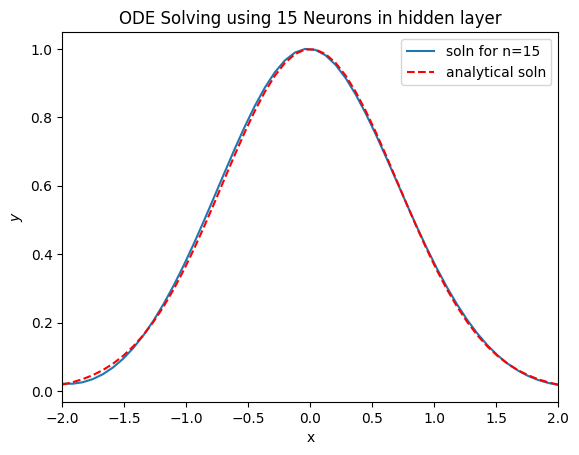

In [ ]:
tfit = np.linspace(-2, 2).reshape(-1, 1)
for n in [5, 10, 15]:
    print(f"Running model having {n} neuron in hidden layer")
    params = model(n)
    plt.plot(tfit, y(params, tfit), label=f'soln for n={n}')
    plt.plot(tfit,(np.exp(-tfit**2)), 'r--', label='analytical soln')
    plt.xlabel('x')
    plt.ylabel('$y$')
    plt.title(f"ODE Solving using {n} Neurons in hidden layer")
    plt.xlim([-2, 2])
    plt.legend()
    plt.show()

### What happens when update the architecture to [1,10,1]?
### i.e. check what happens when you use 10 neurons in the hidden layer.
### Can we achieve a similar solution when you use the architecture [1,5,1] and same model but using large number of
### training iterations? Try it out.

##### Achiving accuracy for 5 neurons model similar to 10 neurons model by incresing iteration

In [226]:
def callback(params, step, g):
    if step % 500 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))

In [227]:
def model1(neurons, n_iter):
    layer_sizes = [1, neurons, 1]
    # Make an initial guess of params:
    params = init_random_params(layer_sizes=layer_sizes)
    # Note that we are using a single hidden layer network. There is only one input and one output.

    # ODE solver for n nodes
    # grad(losfunciton) = d J(theta) / d theta
    params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=n_iter)

    return params

Running model having 5 neuron in hidden layer with 10000 iterations
Iteration   0 lossfunction 103.2748317267323
Iteration 500 lossfunction 0.027726326565094585
Iteration 1000 lossfunction 0.010231355755452832
Iteration 1500 lossfunction 0.005322558264450799
Iteration 2000 lossfunction 0.002723067209198093
Iteration 2500 lossfunction 0.002179039197281214
Iteration 3000 lossfunction 0.016914938465009615
Iteration 3500 lossfunction 0.0795097769624122
Iteration 4000 lossfunction 0.0054535032945759905
Iteration 4500 lossfunction 0.0010205315313567417
Iteration 5000 lossfunction 0.0008420566636956246
Iteration 5500 lossfunction 0.0007053927314972539
Iteration 6000 lossfunction 0.01018048444059934
Iteration 6500 lossfunction 0.0006903543882658774
Iteration 7000 lossfunction 0.004740764374148851
Iteration 7500 lossfunction 0.0005118839799793434
Iteration 8000 lossfunction 0.0005029830065167548
Iteration 8500 lossfunction 0.08112060504971856
Iteration 9000 lossfunction 0.10839939350616101
Iter

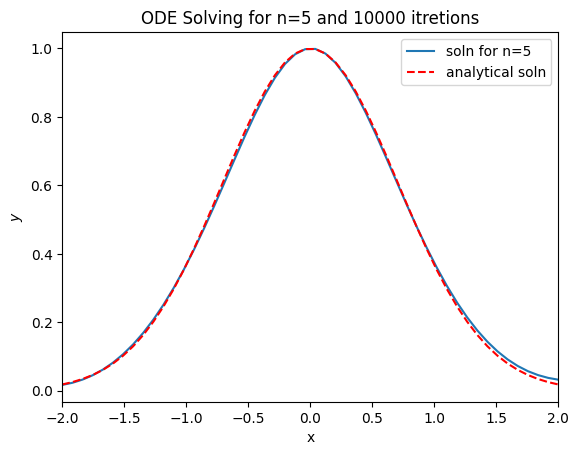

Running model having 10 neuron in hidden layer with 1000 iterations
Iteration   0 lossfunction 23.061263753151106
Iteration 500 lossfunction 0.00031610468107519233


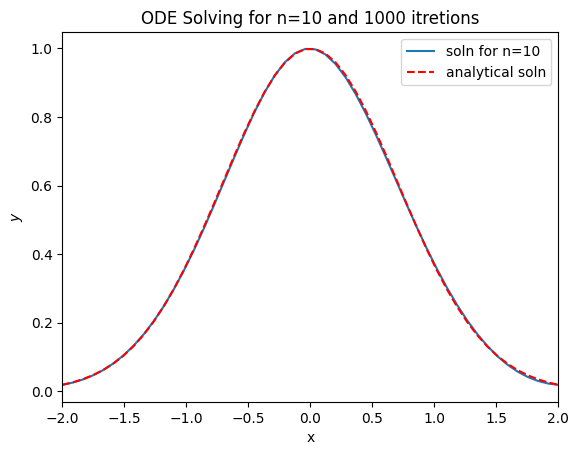

In [228]:
tfit = np.linspace(-2, 2).reshape(-1, 1)
print("Running model having 5 neuron in hidden layer with 10000 iterations")
params = model1(5, 10000)
plt.plot(tfit, y(params, tfit), label='soln for n=5')
plt.plot(tfit,(np.exp(-tfit**2)), 'r--', label='analytical soln')
plt.xlabel('x')
plt.ylabel('$y$')
plt.title("ODE Solving for n=5 and 10000 itretions")
plt.xlim([-2, 2])
plt.legend()
plt.show()

print("Running model having 10 neuron in hidden layer with 1000 iterations")
params = model1(10, 1000)
plt.plot(tfit, y(params, tfit), label='soln for n=10')
plt.plot(tfit,(np.exp(-tfit**2)), 'r--', label='analytical soln')
plt.xlabel('x')
plt.ylabel('$y$')
plt.title("ODE Solving for n=10 and 1000 itretions")
plt.xlim([-2, 2])
plt.legend()
plt.show()

# Answer 2

In [229]:
x_range = 6

In [230]:
# Define the objective function.
def lossfunction(params, step):
    y0 = 1.0
    x = np.linspace(-x_range, x_range).reshape((-1, 1))
    dydx = elementwise_grad(y, 1) # this is the partial derivative of y with respect to inputs i.e. x
    # The objective is to minimize i.e. tend to zero.
    # dydx = -2x^3 − exp(−x)
    # ycall = y(params,inputs)
    zeq = dydx(params, x) - (2*(x**3) - np.exp(-x))
    ic = y(params, 0) - y0 # For my solution i.e. a set of paramaters 'params' this condition should be satisfied
    # since this is the intial condition.
    # If I minimize zeq and ic together or in some combined form, I will get a set of 'params' that give me
    # solution of dy/dx
    # Let us setup the loss function as zeq + ic
    return np.mean(zeq**2 + ic**2)

In [231]:
def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))

In [232]:
def model(neurons):
    layer_sizes = [1, neurons, 1]
    # Make an initial guess of params:
    params = init_random_params(layer_sizes=layer_sizes)
    # Note that we are using a single hidden layer network. There is only one input and one output.

    # ODE solver for n nodes
    # grad(losfunciton) = d J(theta) / d theta
    params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=8000)

    return params

Solution of the Equation is:
$~y(x) = \frac{1}{2}~x^4 + e^{-x}$

Running model having 5 neuron in hidden layer
Iteration   0 lossfunction 59994.21028991541
Iteration 1000 lossfunction 45341.562006905784
Iteration 2000 lossfunction 45317.23630281633
Iteration 3000 lossfunction 45308.00068813422
Iteration 4000 lossfunction 44760.54124042414
Iteration 5000 lossfunction 43870.852304684784
Iteration 6000 lossfunction 42942.23829673566
Iteration 7000 lossfunction 42090.279747794484


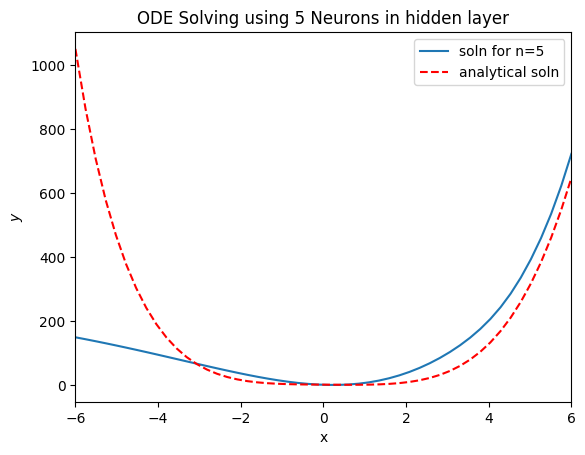

Running model having 10 neuron in hidden layer
Iteration   0 lossfunction 60588.69930092538
Iteration 1000 lossfunction 4647.941896832269
Iteration 2000 lossfunction 3560.6886495631666
Iteration 3000 lossfunction 2708.1944267160056
Iteration 4000 lossfunction 2057.9690023670582
Iteration 5000 lossfunction 1557.9029735656356
Iteration 6000 lossfunction 1184.9125512597009
Iteration 7000 lossfunction 908.398737176015


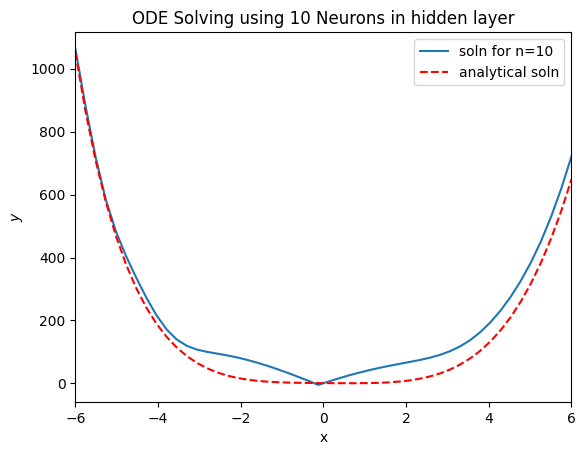

Running model having 20 neuron in hidden layer
Iteration   0 lossfunction 60730.60085833924
Iteration 1000 lossfunction 39.974112560156634
Iteration 2000 lossfunction 15.891213720650596
Iteration 3000 lossfunction 6.348599883670822
Iteration 4000 lossfunction 2.8534991716424973
Iteration 5000 lossfunction 1.623311199475637
Iteration 6000 lossfunction 1.0320335796487783
Iteration 7000 lossfunction 2.19043205345525


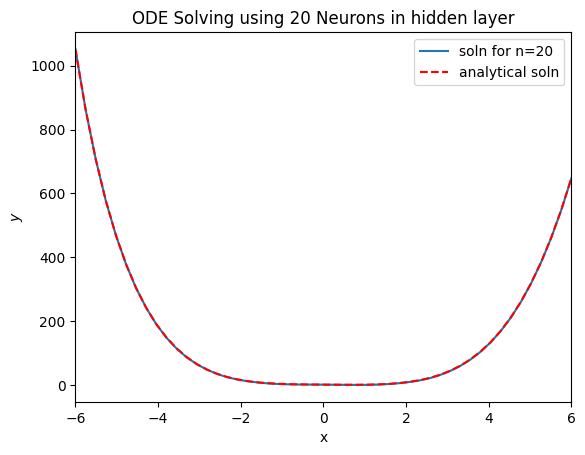

In [233]:
tfit = np.linspace(-x_range, x_range).reshape(-1, 1)
for n in [5, 10, 20]:
    print(f"Running model having {n} neuron in hidden layer")
    params = model(n)
    plt.plot(tfit, y(params, tfit), label=f'soln for n={n}')
    plt.plot(tfit,(0.5*(tfit**4) + np.exp(-tfit)), 'r--', label='analytical soln')
    plt.xlabel('x')
    plt.ylabel('$y$')
    plt.title(f"ODE Solving using {n} Neurons in hidden layer")
    plt.xlim([-x_range, x_range])
    plt.legend()
    plt.show()